<a href="https://colab.research.google.com/github/teja2210/enigma-tales/blob/main/Topic_Modelling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**SETTING UP**


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import nltk ; 
nltk.download('stopwords')
nltk.download('punkt')
!pip install textsearch
!pip install contractions
!pip install textsearch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 35.0 MB/s 


In [ ]:
!python3 -m spacy download en
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install wordcloud

     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8e45480533431192ecd4b4511cda0a7f4702c69cf668b23f70c5cc987f290477
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for 

#**SETTING UP FOR MALLET**

In [ ]:
!pip install --upgrade gensim==3.8

     |████████████████████████████████| 24.2 MB 81.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.14.1" 2022-02-08
OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

#**WORDCLOUD**

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


df_wc = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/mr_paper/Combined_Data.csv", encoding ="latin-1")

In [ ]:
df_wc.head()

,ï»¿Experiences
0,nah just give a company on the internet all yo...
1,chatbots are awful
2,"it's so the customer doesn't do it, and it wor..."
3,"i didn't check it, but it probably autorenews ..."
4,> very annoying for the consumer.\n\ndoubly an...


In [ ]:
df_wc["Experiences"] = df_wc["ï»¿Experiences"]

In [ ]:
df_wc = df_wc.drop("ï»¿Experiences", axis=1)

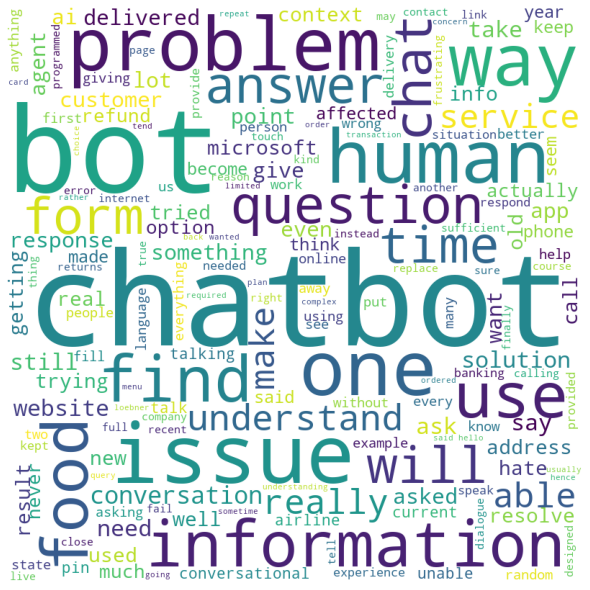

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_wc.Experiences:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


##**TEXT PREPROCESSING**

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

#**TEXT CLEANING**

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/mr_paper/Combined_Data.csv')

In [ ]:
df = df_wc
df.head()

,Experiences
0,nah just give a company on the internet all yo...
1,chatbots are awful
2,"it's so the customer doesn't do it, and it wor..."
3,"i didn't check it, but it probably autorenews ..."
4,> very annoying for the consumer.\n\ndoubly an...


In [ ]:
# data = df.Experiences.values.tolist()
# data = [re.sub('\S*@\S*\s?', '', x) for x in data]
# data = [re.sub('\s+', ' ', x) for x in data]
# # data = [re.sub("\'", "", sent) for sent in data]
# pprint(data[:1])

In [ ]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

nltk.download('words')
from nltk.corpus import words
  
correct_words = words.words()


def spelling_fix(text):
    new_text = []
    incorrect_words = nltk.word_tokenize(text)
    for word in incorrect_words:
        temp = [(jaccard_distance(set(ngrams(word, 2)),
                                  set(ngrams(w, 2))),w)
                for w in correct_words if w[0]==word[0]]
        most_similar_list = sorted(temp, key = lambda val:val[0])
        
        if len(most_similar_list) == 0:
            new_text.append(word)
            continue
            
        if most_similar_list[0][0] >= 0.9:
            new_text.append(most_similar_list[0][1])
        else:
            new_text.append(word)
            
    return " ".join(new_text)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def remove_emoji(text):
    regex_pattern = re.compile("["                               
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U0001F1E6-\U0001F1FF"  # flags                              
                               "]+", flags=re.UNICODE)

    return regex_pattern.sub(r'', text)


def remove_email(text):
    return re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '', text)


def remove_repeated_char(text):
    return re.sub(r'(.)\1\1{1,}', r'\1\1', text)


def remove_account_tag(text):
    return re.sub(r'@[\w]+', '', text)


def remove_hashtag(text):
    return re.sub(r'#[\w]+', '', text)


def remove_links(text):
    return re.sub(r'http[^\s]+', '', text)


def remove_spaces(text):
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    return text


def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    return " ".join([w for w in word_tokens if not w in stop_words])


def remove_less_2_characters(text):
    return re.sub(r"\W*\b\w{1,2}\b", '', text)

def preprocess_text_cols(df, col):
    df[col] = df[col].apply(lambda x: preprocess_text_sample(x))
    return df

def preprocess_df(df, col="content"):
    df = preprocess_text_cols(df, col)
    df.dropna(inplace=True)
    return df

In [ ]:
def preprocess_text_sample(text):
    #text = remove_emoji(text)
    #text = remove_email(text)
    text = remove_repeated_char(text)
    text = remove_account_tag(text)
    text = remove_hashtag(text)
    text = remove_links(text)
    text = remove_stop_words(text)
    text = remove_spaces(text)
    #text = remove_less_2_characters(text)
    text = text.strip()
    text = text.lower()
    #text = spelling_fix(text)
    # text = lemmatize(text)
    return text

In [ ]:
df.head(2)

,Experiences
0,nah just give a company on the internet all yo...
1,chatbots are awful


In [ ]:
df['Experiences'] = df['Experiences'].fillna('').apply(str)

In [ ]:
df = preprocess_df(df, "Experiences")
df = df[df["Experiences"] != ""]
df

In [ ]:
df.to_csv('Combined_Data_clean.csv')

In [ ]:
data = df.Experiences.values.tolist()
pprint(data[:1])

['nah give company internet information , whats worst could hap.. oo']


#**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

# The x in the lambda function is a row (because I set axis=1)
# Apply iterates the function accross the dataframe's rows
df['polarity'] = df.apply(lambda x: TextBlob(x['Experiences']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['Experiences']).sentiment.subjectivity, axis=1)

print(df)

                                         ï»¿Experiences  \
0     Cool bot. It's for US as I can see. I have a u...   
1     IÃ¢â¬â¢m looking for a chatbot builder for W...   
2                                                    Hi   
3                                         DM'ed you. :)   
4     Hey u/fettyfay you can check out [Haptik](http...   
...                                                 ...   
5834                                          [deleted]   
5835  Funny, I actually just finished and sent my re...   
5836  Haha. Thanks but i won't. Surely their mind wi...   
5837                                            Lol. Ok   
5838  Super, I think that your answer will speak loa...   

                                            Experiences  polarity  \
0     cool bot. it's for us as i can see. i have a u...  0.350000   
1     iã¢â¬â¢m looking for a chatbot builder for w...  0.800000   
2                                                    hi  0.000000   
3              

In [ ]:
df.to_csv("reddit_sentiment_analysis.csv")

#**LDA**

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['nah', 'give', 'company', 'internet', 'information', 'whats', 'worst', 'could', 'hap', 'oo']]


In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['nah', 'give', 'company', 'internet', 'information', 'whats', 'worst', 'could', 'hap', 'oo']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

[['give', 'company', 'internet', 'information', 's', 'bad', 'could', 'hap', 'oo']]


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=10,
                                           update_every=2,
                                           chunksize=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:821: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.055*"want" + 0.034*"food" + 0.030*"make" + 0.029*"customer" + '
  '0.019*"order" + 0.015*"call" + 0.014*"refund" + 0.014*"asking" + '
  '0.009*"conversational" + 0.009*"change"'),
 (1,
  '0.043*"problem" + 0.038*"could" + 0.037*"chatbot" + 0.033*"human" + '
  '0.030*"transaction" + 0.025*"deliver" + 0.020*"information" + 0.019*"also" '
  '+ 0.016*"give" + 0.015*"many"'),
 (2,
  '0.132*"bot" + 0.070*"issue" + 0.025*"try" + 0.020*"get" + 0.016*"provide" + '
  '0.014*"much" + 0.013*"keep" + 0.013*"wrong" + 0.012*"hence" + '
  '0.012*"never"'),
 (3,
  '0.047*"answer" + 0.036*"question" + 0.025*"take" + 0.024*"way" + '
  '0.022*"speak" + 0.016*"conversation" + 0.011*"example" + 0.010*"regard" + '
  '0.007*"break" + 0.006*"form"'),
 (4,
  '0.044*"use" + 0.039*"able" + 0.031*"respond" + 0.026*"need" + 0.023*"ca" + '
  '0.021*"find" + 0.020*"lot" + 0.019*"ask" + 0.018*"even" + 0.018*"service"'),
 (5,
  '0.104*"understand" + 0.062*"time" + 0.046*"result" + 0.016*"response" + '
  '0.01

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.693735867820018

Coherence Score:  0.45870619021702597


Perplexity: -7.7589

Coherence Score: 0.468

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.198288  0.075201       1        1  27.017534
1      0.135591  0.138282       2        1  25.609750
4      0.020025 -0.135786       3        1  16.799120
0      0.018010 -0.031870       4        1  12.665988
5      0.015739 -0.020006       5        1   9.270883
3      0.008923 -0.025821       6        1   8.636725, topic_info=           Term       Freq      Total Category  logprob  loglift
180         bot  66.000000  66.000000  Default  30.0000  30.0000
243  understand  18.000000  18.000000  Default  29.0000  29.0000
292       issue  35.000000  35.000000  Default  28.0000  28.0000
21         want  13.000000  13.000000  Default  27.0000  27.0000
242        time  11.000000  11.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
778        step   0.524699   3.308691   Topic6  -5.7095   0.6077
779        surf   0.524699   3.308691   Topic6  -5.7095   0.6077
731  streamline   0.467506   2.587834   Topic6  -5.8249   0.7380
765       allow   0.401822   2.971541   Topic6  -5.9763   0.4483
766       block   0.401822   2.971541   Topic6  -5.9763   0.4483

[237 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
120       3  0.928932      able
295       2  0.651124  actually
175       2  0.935375   address
396       2  0.929450     agent
138       4  0.560957        ai
...     ...       ...       ...
197       1  0.745094   website
105       6  0.555689      well
437       5  0.572712      word
384       2  0.738903     would
91        1  0.838425     wrong

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 6, 4])

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word)

In [ ]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('issue', 0.06321839080459771),
   ('time', 0.031609195402298854),
   ('form', 0.028735632183908046),
   ('answer', 0.028735632183908046),
   ('find', 0.022988505747126436),
   ('deliver', 0.022988505747126436),
   ('customer', 0.020114942528735632),
   ('understand', 0.020114942528735632),
   ('agent', 0.020114942528735632),
   ('result', 0.017241379310344827)]),
 (1,
  [('problem', 0.04843304843304843),
   ('information', 0.037037037037037035),
   ('food', 0.03133903133903134),
   ('call', 0.02849002849002849),
   ('talk', 0.02564102564102564),
   ('chat', 0.022792022792022793),
   ('lot', 0.019943019943019943),
   ('option', 0.017094017094017096),
   ('respond', 0.014245014245014245),
   ('phone', 0.014245014245014245)]),
 (2,
  [('bot', 0.15606936416184972),
   ('make', 0.046242774566473986),
   ('find', 0.023121387283236993),
   ('understand', 0.023121387283236993),
   ('website', 0.023121387283236993),
   ('solution', 0.023121387283236993),
   ('provide', 0.02312138728323

In [ ]:
!pip install tethne.networks

ERROR: Could not find a version that satisfies the requirement tethne.networks (from versions: none)
ERROR: No matching distribution found for tethne.networks


In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
lda_mallet = convertldaGenToldaMallet(ldamallet)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_mallet, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.140556  0.354138       1        1  26.604226
2     -0.105254 -0.258933       2        1  25.846030
3     -0.338341  0.075117       3        1  24.191605
1      0.303039 -0.170323       4        1  23.358139, topic_info=         Term       Freq      Total Category  logprob  loglift
10    chatbot  68.000000  68.000000  Default  30.0000  30.0000
180       bot  64.000000  64.000000  Default  29.0000  29.0000
292     issue  30.000000  30.000000  Default  28.0000  28.0000
125      find  21.000000  21.000000  Default  27.0000  27.0000
18       make  21.000000  21.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
686    choice   4.077664   4.077664   Topic4  -4.6540   1.4542
255  continue   2.718442   2.718442   Topic4  -5.0594   1.4542
147    answer  14.951434  16.235330   Topic4  -3.3547   1.3718
65     result   6.796106   7.985510   Topic4  -4.1431   1.2929
138        ai   4.077664   5.267067   Topic4  -4.6540   1.1983

[220 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
95        3  0.755471  abusive
36        2  0.778879   access
11        1  0.840758  account
121       2  0.778879    actor
175       1  0.827413  address
...     ...       ...      ...
119       3  0.755471  virtual
197       3  1.038772  website
22        2  0.934655     work
91        4  0.919644    wrong
26        2  0.934655     year

[197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)

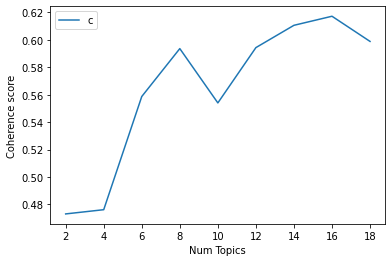

In [ ]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#**K Means(Not Applicable)**




In [ ]:
import nltk
import re
import numpy as np
import contractions

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['Description']))
len(norm_corpus)

60

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'three', 'four', 'five', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.99, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(60, 1367)

In [ ]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=100, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=100, random_state=42)

In [ ]:
from collections import Counter

Counter(km.labels_)

Counter({0: 55, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

In [ ]:
df['kmeans_cluster'] = km.labels_

In [ ]:
bot_clusters = (df[['title', 'kmeans_cluster', 'Sentiment_Score']]
                  .sort_values(by=['kmeans_cluster', 'Sentiment_Score'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
bot_clusters = bot_clusters.copy(deep=True)

#**AGGLOMERATIVE HIERARCHIAL CLUSTERING**




##**APPROACH 1**

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
#     # set size
#     fig, ax = plt.subplots(figsize=figure_size) 
#     movie_titles = movie_data['title'].values.tolist()
#     # plot dendrogram
#     R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
#                     truncate_mode='lastp', 
#                     p=p,  
#                     no_plot=True)
#     temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
#     def llf(xx):
#         return "{}".format(temp[xx])
#     ax = dendrogram(
#             linkage_matrix,
#             truncate_mode='lastp',
#             orientation="left",
#             p=p,  
#             leaf_label_func=llf, 
#             leaf_font_size=10.,
#             )
#     plt.tick_params(axis= 'x',   
#                     which='both',  
#                     bottom='off',
#                     top='off',
#                     labelbottom='off')
#     plt.tight_layout()
#     plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [ ]:
from gensim.models import FastText

tokenized_docs = [doc.split() for doc in norm_corpus]
ft_model = FastText(tokenized_docs, size=300, window=40, min_count=2, workers=4, sg=1, iter=100)

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:383: DeprecationWarning: Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).
  self.wv.bucket = self.bucket
/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:522: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  l1_size = self.layer1_size * np.dtype(np.float32).itemsize
/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:526: DeprecationWarning: Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).
  num_buckets = self.bucket


In [ ]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
doc_vecs_ft = averaged_word2vec_vectorizer(tokenized_docs, ft_model, 300)
doc_vecs_ft.shape

(60, 300)

In [ ]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [ ]:
linkage_matrix = ward_hierarchical_clustering(doc_vecs_ft)

In [ ]:
np.set_printoptions(suppress=True)
print(linkage_matrix)

[[ 19.          25.           0.           2.        ]
 [ 26.          60.           0.           3.        ]
 [ 34.          61.           0.           4.        ]
 [ 35.          62.           0.           5.        ]
 [ 44.          63.           0.           6.        ]
 [ 52.          64.           0.           7.        ]
 [  2.          32.           0.13905319   2.        ]
 [  4.          37.           0.17995031   2.        ]
 [ 14.          15.           0.18280827   2.        ]
 [ 28.          41.           0.19429407   2.        ]
 [ 47.          66.           0.21870544   3.        ]
 [ 43.          49.           0.2669961    2.        ]
 [ 31.          45.           0.26996626   2.        ]
 [ 11.          59.           0.33167401   2.        ]
 [ 70.          72.           0.33977042   5.        ]
 [  1.          24.           0.34133857   2.        ]
 [  0.          23.           0.39170324   2.        ]
 [ 16.          55.           0.4035882    2.        ]
 [  6.    

##**APPROACH 2**

In [ ]:
corpus_text = '\n'.join(df['Description'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]

In [ ]:
def clean(s):
    return [w.strip(',."!?:;()\'') for w in s]
sentences = [clean(s) for s in sentences if len(s) > 0]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, size=65, window=5, min_count=3, workers=10)

In [ ]:
vectors = model.wv

In [ ]:
# vectors['bot']        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


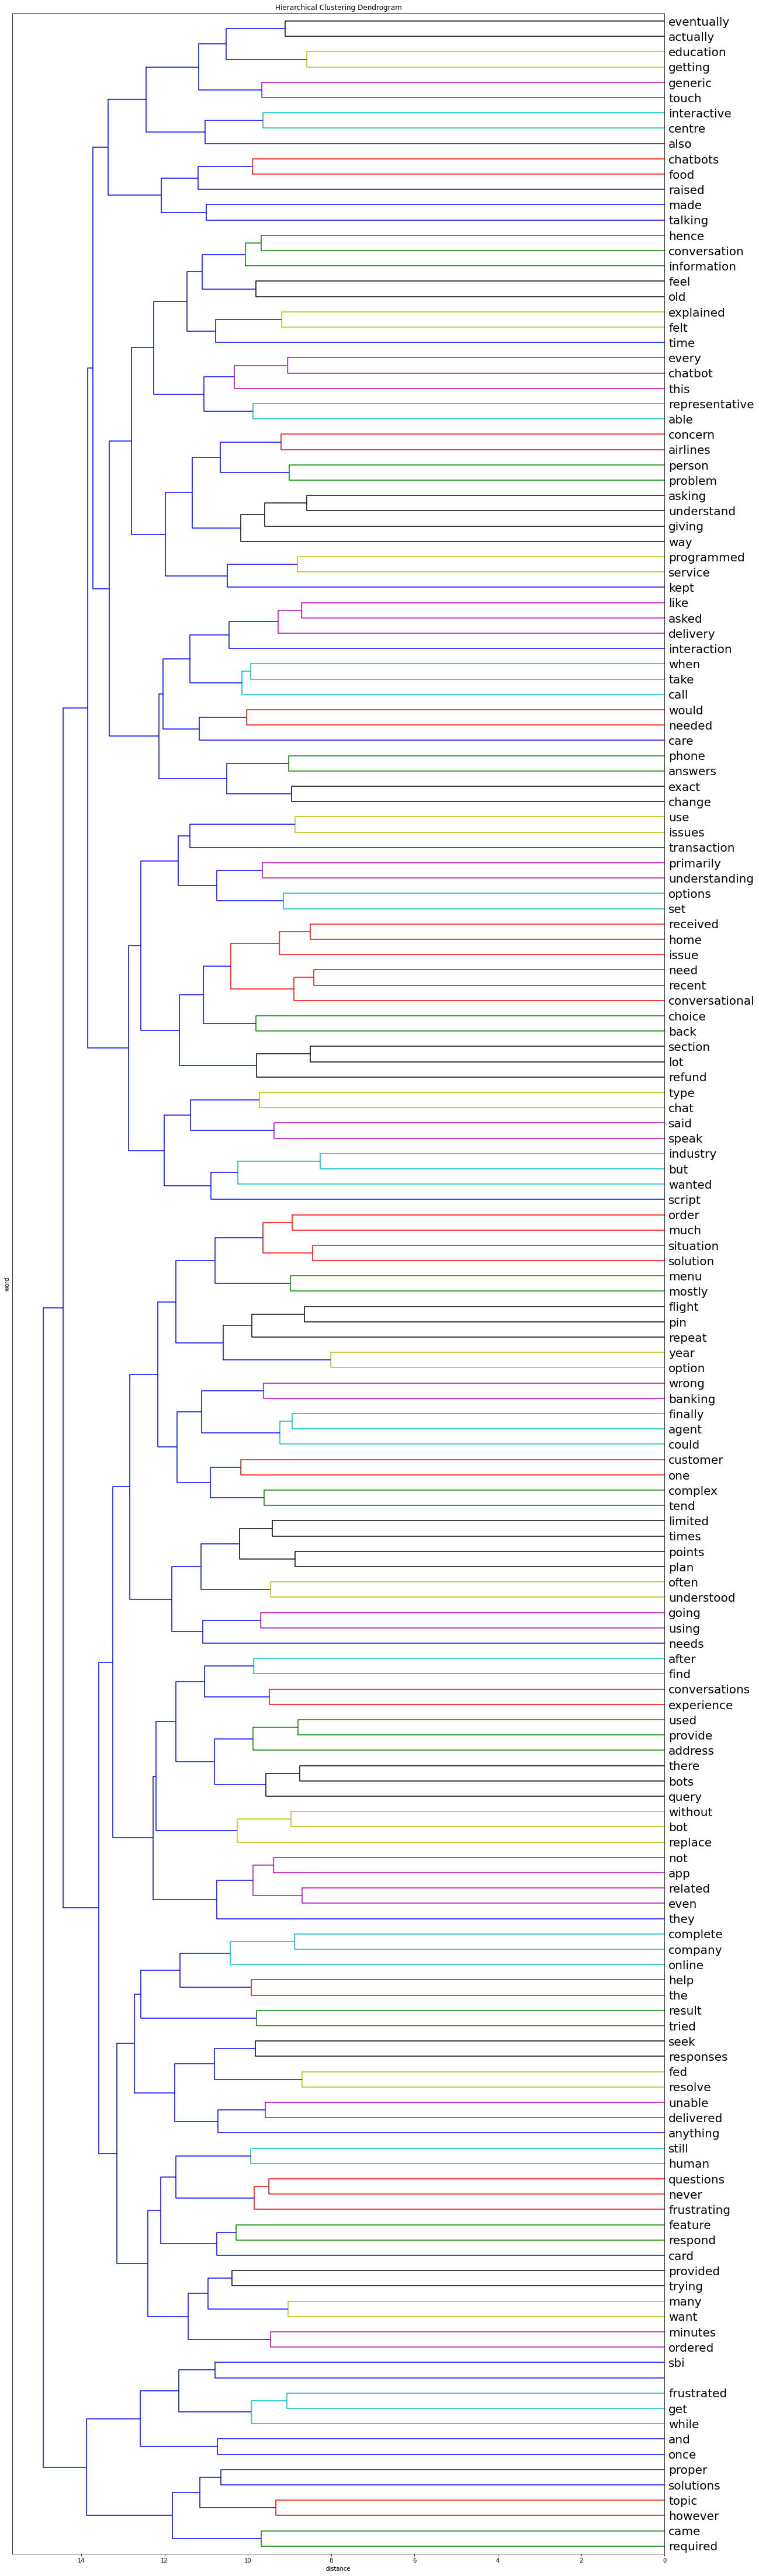

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(20, 80))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=20.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

In [ ]:
word_vectors = model.wv
from gensim.models import KeyedVectors
word_vectors.save('vectors.kv')
reloaded_word_vectors = KeyedVectors.load('vectors.kv')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
